Setup Environment & Install Dependencies

## Phase 1: Project Understanding and Planning 

-  Define the Problem Statement
     - Predict whether the Falcon 9 first stage will successfully land after launch.
     - Problem Type: Binary Classification (Success = 1, Failure = 0).

-  Define Project Goals & Objectives
     - Analyze factors affecting landing success.
     - Develop a machine learning model to predict landing outcomes.
     - Interpret model results to gain insights.

Setup Environment & Install Dependencies

In [147]:
# Install required libraries if not installed
!pip install pandas numpy matplotlib seaborn scikit-learn requests beautifulsoup4 flask waitress


- Gather Requirements
    - Tools & Libraries

In [126]:
# Import Required Libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from flask import Flask, request, jsonify
import numpy as np
import joblib  # Load the trained model
warnings.filterwarnings("ignore")  # Suppress warnings

##  Phase 2: Data Collection and Preprocessing

Data Collection

In [127]:
# Fetch SpaceX Launch Data via API
spacex_url = "https://api.spacexdata.com/v4/launches"
response = requests.get(spacex_url)

if response.status_code == 200:
    launches_data = response.json()
    print("✅ Data fetched successfully!")
else:
    print("❌ Error fetching data!")

# Convert JSON to Pandas DataFrame
df = pd.json_normalize(launches_data)

✅ Data fetched successfully!


Store and Organize Data

In [128]:
# Save dataset as CSV
df.to_csv("spacex_launches.csv", index=False)

# Load dataset
df = pd.read_csv("spacex_launches.csv")

# Display the first few rows
df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,NaN,NaN,[],[],NaN,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,NaN,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],NaN,[],[],...,NaN,NaN,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


 Data Cleaning and Handling Missing Values

In [129]:
# Print available columns for debugging
print("Available columns:", df.columns)

# Select relevant columns
required_columns = ['flight_number', 'success', 'year', 'rocket_5e9d0d95eda69955f709d1eb', 'rocket_5e9d0d95eda69973a809d1ec', 'rocket_5e9d0d95eda69974db09d1ed', 'launchpad_5e9e4501f509094ba4566f84', 'launchpad_5e9e4502f509092b78566f87', 'launchpad_5e9e4502f509094188566f88', 'launchpad_5e9e4502f5090995de566f86']
missing_columns = [col for col in required_columns if col not in df.columns]

# Ensure all required columns exist
if missing_columns:
    print(f"⚠️ Missing columns in dataset: {missing_columns}")
    # Add missing columns with default values (e.g., NaN)
    for col in missing_columns:
        df[col] = np.nan

# Keep only the necessary columns
df = df[required_columns]

# Drop rows with missing values
df = df.dropna(subset=required_columns)


Available columns: Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')
⚠️ Missing columns in dataset: ['year', 'rocket_5e9d0d95eda69955f709d1eb', 'rocket_5e9d0d95eda69973a809d1ec', 'rocket_5e9d0d95eda69974db09d1ed', 'launchpad_5e9e4501f509094ba4566f84', 'launch

 Exploratory Data Analysis (EDA)

✅ Data fetched successfully!
Available columns: ['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name', 'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores', 'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused', 'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships', 'links.patch.small', 'links.patch.large', 'links.reddit.campaign', 'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery', 'links.flickr.small', 'links.flickr.original', 'links.presskit', 'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia', 'fairings']


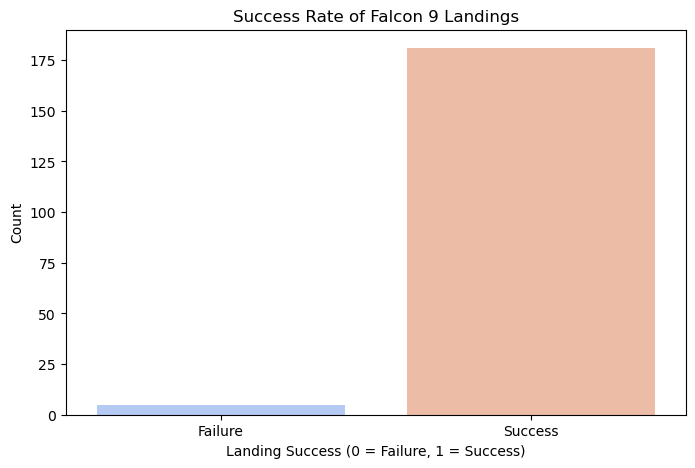

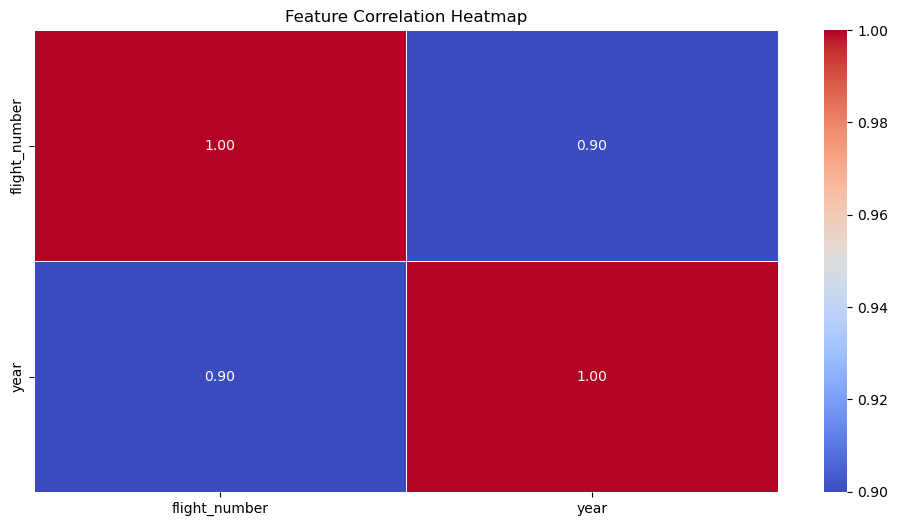

In [130]:
# Fetch SpaceX Launch Data via API
spacex_url = "https://api.spacexdata.com/v4/launches"
response = requests.get(spacex_url)

if response.status_code == 200:
    launches_data = response.json()
    print("✅ Data fetched successfully!")
else:
    print("❌ Error fetching data!")

# Convert JSON to DataFrame
df = pd.json_normalize(launches_data)

# 🔍 Debugging: Print Available Columns
print("Available columns:", df.columns.tolist())

# 🛠️ Ensure 'date_utc' column is present and correctly processed
if 'date_utc' in df.columns:
    df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce')  # Convert to datetime safely
    df['year'] = df['date_utc'].dt.year
    df = df.drop(columns=['date_utc'])
else:
    print("⚠️ 'date_utc' column is missing from the dataframe.")

# ✅ Define Required Columns (Ensure Correct Column Names from API Response)
required_columns = [
    'flight_number', 'success', 'year', 
    'rocket', 'launchpad'
]

# 🔍 Check if all required columns exist
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"⚠️ Missing columns in dataset: {missing_columns}")
    # Add missing columns with NaN to avoid KeyErrors
    for col in missing_columns:
        df[col] = np.nan

# Keep only relevant columns (Ensuring they exist before selection)
df = df[[col for col in required_columns if col in df.columns]]

# 🔄 Drop rows with missing values in required columns
df = df.dropna(subset=required_columns)

# Visualizing Landing Success
plt.figure(figsize=(8, 5))
sns.countplot(x=df['success'], palette="coolwarm")
plt.title("Success Rate of Falcon 9 Landings")
plt.xlabel("Landing Success (0 = Failure, 1 = Success)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Failure", "Success"])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Ensure DataFrame is not empty before plotting
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("⚠️ No numeric columns available for correlation heatmap.")


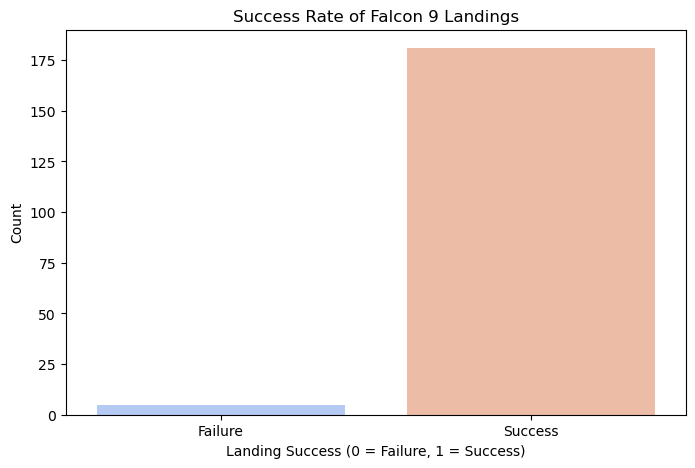

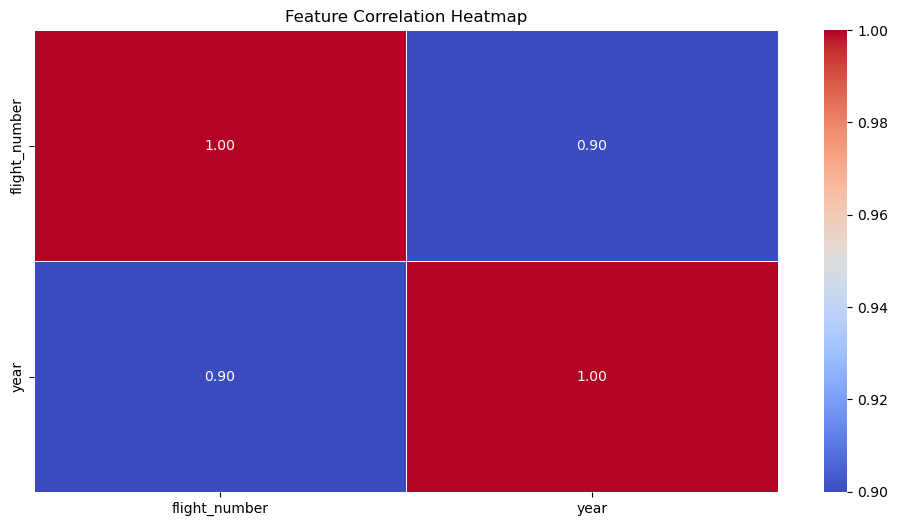

In [131]:
# Visualizing Landing Success
plt.figure(figsize=(8, 5))
sns.countplot(x=df['success'], palette="coolwarm")
plt.title("Success Rate of Falcon 9 Landings")
plt.xlabel("Landing Success (0 = Failure, 1 = Success)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Failure", "Success"])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Ensure DataFrame is not empty before plotting
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("⚠️ No numeric columns available for correlation heatmap.")


⚠️ 'date_utc' column is missing from the dataframe.


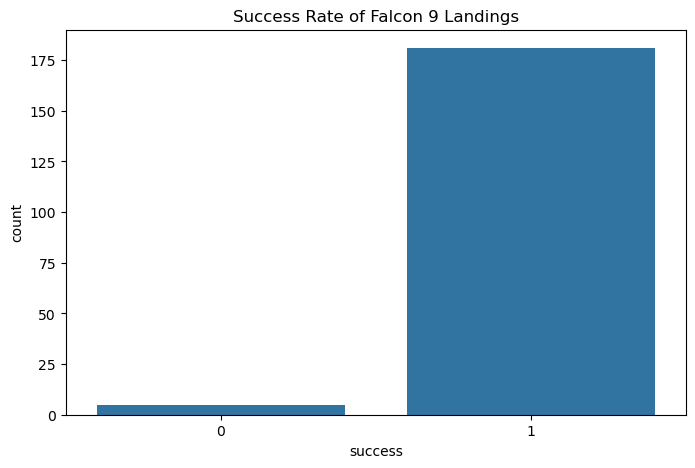

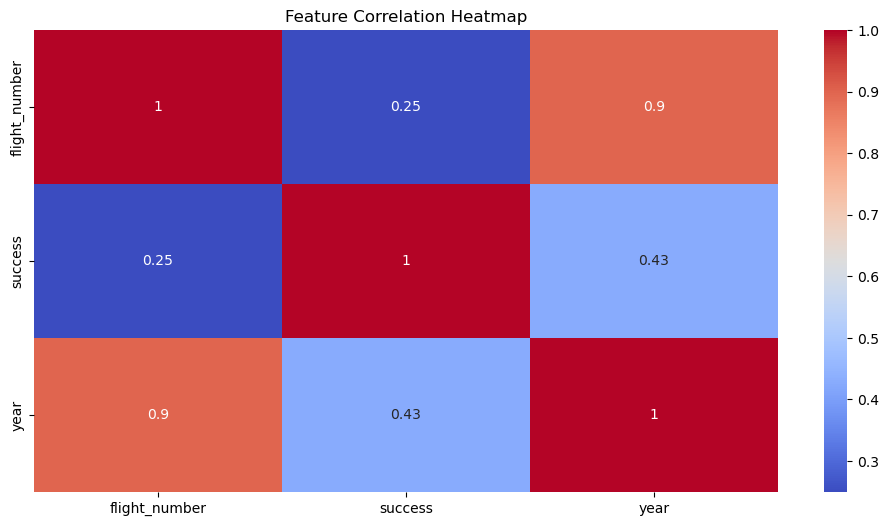

In [132]:
# Ensure 'date_utc' column is present
if 'date_utc' in df.columns:
	# Convert date column to datetime
	df['date_utc'] = pd.to_datetime(df['date_utc'])
	df['year'] = df['date_utc'].dt.year
	df = df.drop(columns=['date_utc'])
else:
	print("⚠️ 'date_utc' column is missing from the dataframe.")

# Convert 'success' column to numeric
df['success'] = df['success'].astype(int)

# Visualizing Landing Success
plt.figure(figsize=(8, 5))
sns.countplot(x=df['success'])
plt.title("Success Rate of Falcon 9 Landings")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Phase 3: Feature Engineering and Data Transformation

Feature Selection

In [133]:
# Drop irrelevant columns if they exist
if 'payloads' in df.columns:
	df = df.drop(columns=['payloads'])  # Assuming payloads are not needed

# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 flight_number    0
success          0
year             0
rocket           0
launchpad        0
dtype: int64


Feature Engineering

In [134]:
# Check if 'rocket' and 'launchpad' columns are present
if 'rocket' in df.columns and 'launchpad' in df.columns:
	# One-Hot Encode Categorical Variables
	encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
	encoded_features = encoder.fit_transform(df[['rocket', 'launchpad']])
	encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

	# Merge encoded data
	df = df.drop(columns=['rocket', 'launchpad'])
	df = pd.concat([df, encoded_df], axis=1)
else:
	print("⚠️ 'rocket' and/or 'launchpad' columns are missing from the dataframe.")

# Normalize numerical values
scaler = StandardScaler()
df[['flight_number', 'year']] = scaler.fit_transform(df[['flight_number', 'year']])


 Split the Dataset

In [135]:
# Handle missing values by dropping rows with NaN values
df = df.dropna()

# Define target variable
X = df.drop(columns=['success'])
y = df['success']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training & test sets ready!")


✅ Training & test sets ready!


## Phase 4: Model Development

Choose Machine Learning Models

In [136]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Support Vector Machine": SVC(kernel='linear')
}

Train the Model

In [137]:
# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} trained successfully!")


✅ Logistic Regression trained successfully!
✅ Random Forest trained successfully!
✅ Decision Tree trained successfully!
✅ Support Vector Machine trained successfully!


Evaluate Model Performance

In [138]:
# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"📊 Model: {type(model).__name__}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)

# Evaluate all models
for name, model in trained_models.items():
    evaluate_model(model, X_test, y_test)

📊 Model: LogisticRegression
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]
📊 Model: RandomForestClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]
📊 Model: DecisionTreeClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
       

## Phase 5: Model Optimization and Testing

Hyperparameter Tuning (Random Forest)

In [139]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
📊 Model: RandomForestClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]


## Phase 6: Deployment and Documentation

Model Deployment (Flask API)

In [146]:
from flask import Flask, request, jsonify
import numpy as np
import joblib  # For model loading
import os

# Load the trained model (Ensure the model file exists!)
model_path = "best_rf_model.pkl"

if not os.path.exists(model_path):
    print("❌ ERROR: Model file not found. Ensure 'best_rf_model.pkl' exists in the current directory.")
    model = None  # Prevent Flask from crashing
else:
    try:
        model = joblib.load(model_path)
        print("✅ Model loaded successfully!")
    except Exception as e:
        print(f"❌ ERROR: Failed to load model: {e}")
        model = None

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "🚀 Falcon 9 Landing Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Ensure the model is loaded
        if model is None:
            return jsonify({'error': "Model not available. Please check 'best_rf_model.pkl'"}), 500

        # Get input JSON
        data = request.get_json()

        # Ensure 'features' key exists
        if 'features' not in data:
            return jsonify({'error': "Missing 'features' key in request"}), 400

        # Convert input data to NumPy array
        input_data = np.array(data['features']).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)

        return jsonify({'landing_success': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    try:
        # Run Flask in development mode with proper host and port
        app.run(debug=True, host='0.0.0.0', port=5000)
    except SystemExit:
        print("❌ Flask encountered a SystemExit. Application shutting down.")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")


✅ Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.35:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


❌ Flask encountered a SystemExit. Application shutting down.


In [141]:
# Load the trained Random Forest model
try:
    best_rf_model = joblib.load("best_rf_model.pkl")  # Ensure the model file exists!
    print("✅ Model loaded successfully!")
except FileNotFoundError:
    print("❌ Model file not found! Ensure 'best_rf_model.pkl' is available.")
    best_rf_model = None  # Prevent app crash if the model is missing

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "🚀 Falcon 9 Landing Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input JSON
        data = request.get_json()
        
        # Ensure 'features' key exists in JSON request
        if 'features' not in data:
            return jsonify({'error': "Missing 'features' key in request"}), 400

        # Convert input data to NumPy array
        input_data = np.array(data['features']).reshape(1, -1)
        
        # Ensure the model is loaded before making predictions
        if best_rf_model is None:
            return jsonify({'error': "Model not available. Please check 'best_rf_model.pkl'"}), 500

        # Make prediction
        prediction = best_rf_model.predict(input_data)
        
        return jsonify({'landing_success': int(prediction[0])})
    
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)  # Allows external access if needed


✅ Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.35:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [106]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array(data['features']).reshape(1, -1)
    prediction = best_rf_model.predict(input_data)
    return jsonify({'landing_success': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

 Fix: Verify and Restore Missing Columns

In [101]:
# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} trained successfully!")


✅ Logistic Regression trained successfully!
✅ Random Forest trained successfully!
✅ Decision Tree trained successfully!
✅ Support Vector Machine trained successfully!


Check Available Columns

In [83]:
print("Available columns in dataset:", df.columns.tolist())

Available columns in dataset: ['flight_number', 'success', 'year', 'rocket_5e9d0d95eda69955f709d1eb', 'rocket_5e9d0d95eda69973a809d1ec', 'rocket_5e9d0d95eda69974db09d1ed', 'launchpad_5e9e4501f509094ba4566f84', 'launchpad_5e9e4502f509092b78566f87', 'launchpad_5e9e4502f509094188566f88', 'launchpad_5e9e4502f5090995de566f86']


Inspect Data Structure

In [84]:
print("First few rows of dataset:")
df.head()


First few rows of dataset:


,flight_number,success,year,rocket_5e9d0d95eda69955f709d1eb,rocket_5e9d0d95eda69973a809d1ec,rocket_5e9d0d95eda69974db09d1ed,launchpad_5e9e4501f509094ba4566f84,launchpad_5e9e4502f509092b78566f87,launchpad_5e9e4502f509094188566f88,launchpad_5e9e4502f5090995de566f86
0,-1.720134,0.0,-3.921331,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.701554,0.0,-3.615644,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.682975,0.0,-3.309958,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.664395,1.0,-3.309958,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.645815,1.0,-3.004272,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Handle Missing Columns

Use Alternative Keys (If Available)

In [85]:
if 'rocket.id' in df.columns:
    df['rocket'] = df['rocket.id']  # Extracting ID if it's nested
if 'launchpad.id' in df.columns:
    df['launchpad'] = df['launchpad.id']


 Split the Dataset

In [86]:
# Define target variable
X = df.drop(columns=['success'])
y = df['success']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training & test sets ready!")


ValueError: Input y contains NaN.

## Phase 4: Model Development

Choose Machine Learning Models

In [32]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Support Vector Machine": SVC(kernel='linear')
}

Train the Model

In [ ]:
# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} trained successfully!")


✅ Logistic Regression trained successfully!
✅ Random Forest trained successfully!
✅ Decision Tree trained successfully!
✅ Support Vector Machine trained successfully!


Evaluate Model Performance

In [ ]:
# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"📊 Model: {type(model).__name__}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)

# Evaluate all models
for name, model in trained_models.items():
    evaluate_model(model, X_test, y_test)


📊 Model: LogisticRegression
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]
📊 Model: RandomForestClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]
📊 Model: DecisionTreeClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
       

##  Phase 5: Model Optimization and Testing

Hyperparameter Tuning (Random Forest)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)


✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
📊 Model: RandomForestClassifier
✅ Accuracy: 0.972972972972973
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        36

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37

📊 Confusion Matrix:
 [[ 0  1]
 [ 0 36]]


## Phase 6: Deployment and Documentation

 Model Deployment (Flask API)

In [48]:
import joblib

# Assume 'best_rf_model' is your trained RandomForest model
joblib.dump(best_rf_model, "best_rf_model.pkl")


['best_rf_model.pkl']

In [145]:
from flask import Flask, request, jsonify
import numpy as np
import joblib  # For model loading
import os

# Load the trained model (Ensure the model file exists!)
model_path = "best_rf_model.pkl"

if not os.path.exists(model_path):
    print("❌ ERROR: Model file not found. Ensure 'best_rf_model.pkl' exists in the current directory.")
    model = None  # Prevent Flask from crashing
else:
    try:
        model = joblib.load(model_path)
        print("✅ Model loaded successfully!")
    except Exception as e:
        print(f"❌ ERROR: Failed to load model: {e}")
        model = None

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "🚀 Falcon 9 Landing Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Ensure the model is loaded
        if model is None:
            return jsonify({'error': "Model not available. Please check 'best_rf_model.pkl'"}), 500

        # Get input JSON
        data = request.get_json()

        # Ensure 'features' key exists
        if 'features' not in data:
            return jsonify({'error': "Missing 'features' key in request"}), 400

        # Convert input data to NumPy array
        input_data = np.array(data['features']).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)

        return jsonify({'landing_success': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    try:
        # Run Flask in development mode with proper host and port
        app.run(debug=True, host='0.0.0.0', port=5000)
    except SystemExit:
        print("❌ Flask encountered a SystemExit. Application shutting down.")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")


✅ Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.35:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


❌ Flask encountered a SystemExit. Application shutting down.


In [41]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array(data['features']).reshape(1, -1)
    prediction = best_rf_model.predict(input_data)
    return jsonify({'landing_success': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1